In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
ALL_INFECTED_BY_DATE = pd.read_csv('who_covid_19_sit_rep_time_series.csv')
ALL_INFECTED_BY_DATE['Province/States'].fillna(value='', inplace=True)
ALL_INFECTED_BY_DATE['Country/Region'].fillna(value='', inplace=True)

QUARENTINE_TIME_BY_STATE = pd.read_csv('quarantine_restrictions.csv')
QUARENTINE_TIME_BY_STATE['country'].fillna(value='', inplace=True)
QUARENTINE_TIME_BY_STATE['state/province'].fillna(value='', inplace=True)

In [3]:
def get_infected_for_state(country, state):
    filter_ = (ALL_INFECTED_BY_DATE['Province/States'] == state) & (ALL_INFECTED_BY_DATE['Country/Region'] == country)
    filtered_rows = [row for _, row in ALL_INFECTED_BY_DATE[filter_].iterrows()]
    assert len(filtered_rows) <= 1
    return filtered_rows[0] if filtered_rows else None

In [4]:
x = None
def plot_infected_by_date(infected_by_date):
    global x
    x = infected_by_date
    data_by_date = infected_by_date[3:].transpose()
    return data_by_date.fillna(0)

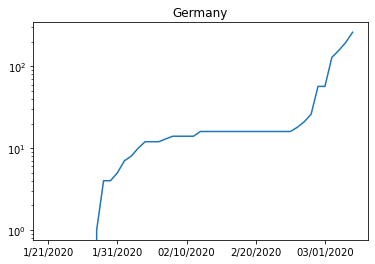

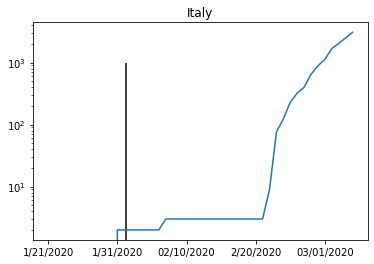

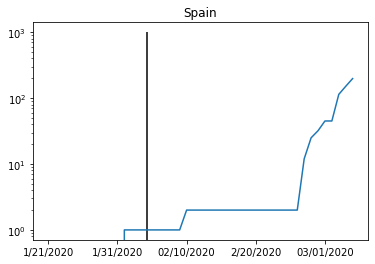

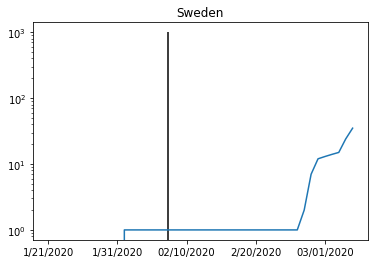

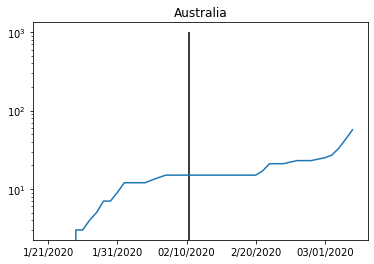

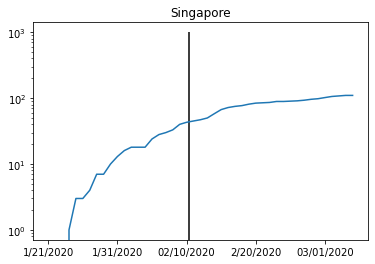

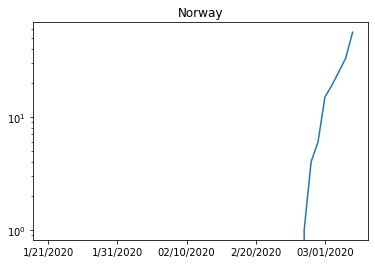

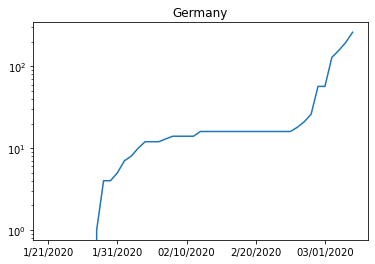

In [5]:
for i, row in QUARENTINE_TIME_BY_STATE.iterrows():
    country = row['country']
    state = row['state/province']
    quarentine_time = row['start_date']
    infected_by_date = get_infected_for_state(country, state)
    if infected_by_date is not None:
        plt.figure(i)
        plt.title(f'{country} - {state}' if state else country)
        plt.vlines(quarentine_time, 0, 1000)
        plot_infected_by_date(infected_by_date).plot(logy=True)